In [25]:
%load_ext autoreload
%autoreload 2

import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

sys.path.append("../")

from superr_venn import supervenn, create_error_profile, oddsratio_venn, create_oddratio_profile, create_stratified_error_profile

# Clone: https://github.com/tctianchi/pyvenn
from baselines.pyvenn import venn

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Small fixed example

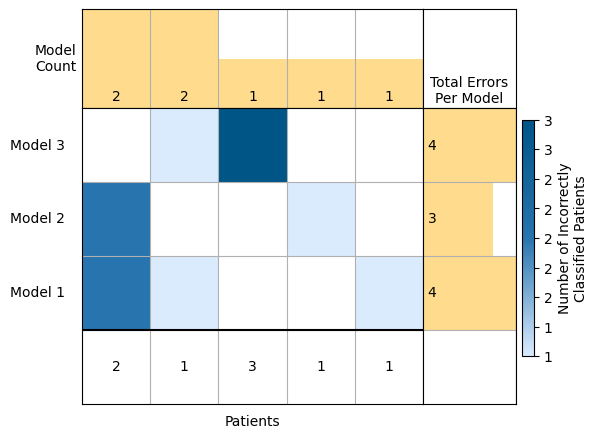

In [ ]:
sets = [{1, 2, 3, 4}, {3, 4, 5}, {1, 6, 7, 8}]
plt.figure()
supervenn(
    sets,
    set_annotations=["Model 1", "Model 2", "Model 3"],
    square_cell=True,
)
plt.show()

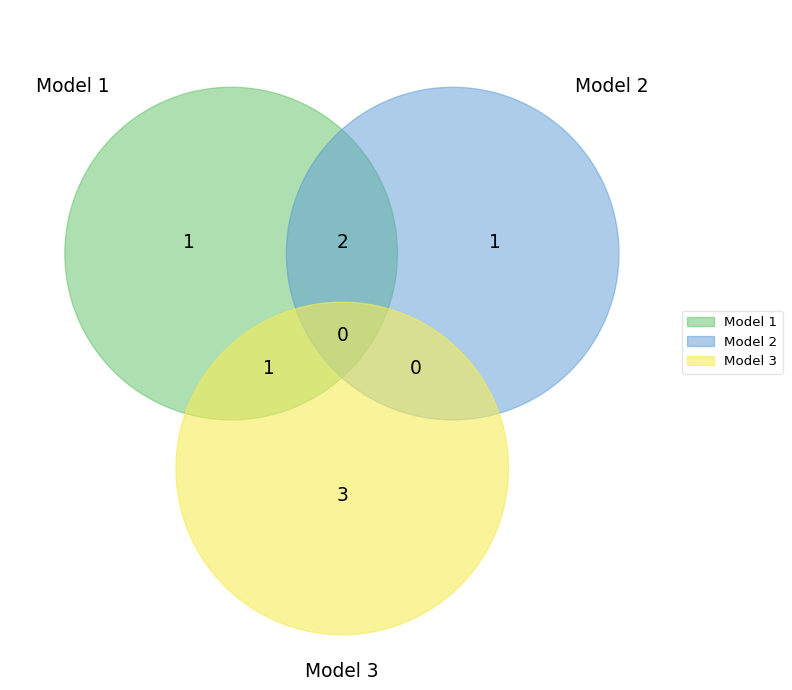

In [ ]:
labels = venn.get_labels(sets, fill=["number"])
fig, ax = venn.venn3(labels, names=["Model 1", "Model 2", "Model 3"])
fig.show()

# Random example

In [ ]:
def generate_sets(n_models, n_samples, overlap=0.75):
    sets = []

    for i in range(n_models):
        # Dependent
        if i == 0:
            sets.append(
                set(
                    np.random.choice(
                        range(n_samples),
                        size=np.random.randint(
                            int(n_samples * 0.20),
                            int(n_samples * 0.30),
                        ),
                        replace=False,
                    )
                )
            )
        else:
            set_selection = np.random.choice(
                range(len(sets)),
                size=np.random.randint(low=max(1, len(sets) - 2), high=len(sets) + 1),
                replace=False,
            )
            prev_set = set({})
            for i in set_selection:
                prev_set = prev_set.union(sets[i])
            new_set = set(
                np.random.choice(
                    list(prev_set),
                    size=np.random.randint(int(len(prev_set)) * overlap, len(prev_set)),
                    replace=False,
                )
            ).union(
                set(
                    np.random.choice(
                        range(n_samples),
                        size=np.random.randint(0, int(n_samples * 0.025)),
                        replace=False,
                    )
                )
            )
            sets.append(new_set)
    return sets

## Easy 2 model

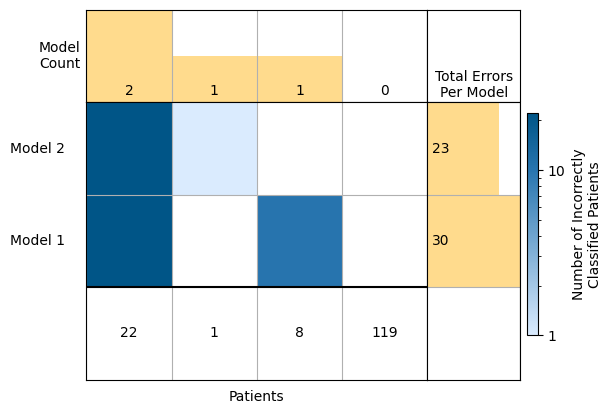

In [356]:
models = 2
set_range = 150

sets = generate_sets(models, set_range)
universe = set(range(set_range))
names = [f"Model {i + 1}" for i in range(models)]

plt.figure()
supervenn(
    sets,
    set_annotations=names,
    log_color=True,
    square_cell=True,
    universe=universe,
)
plt.show()

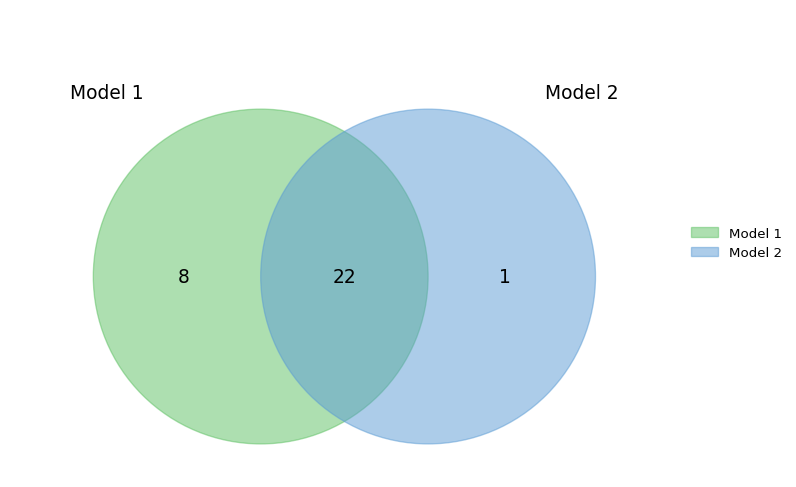

In [357]:
labels = venn.get_labels(sets, fill=["number"])
fig, ax = venn.venn2(labels, names=names)
legend = ax.get_legend()
legend.get_frame().set_alpha(0)
plt.show()

## 3 model

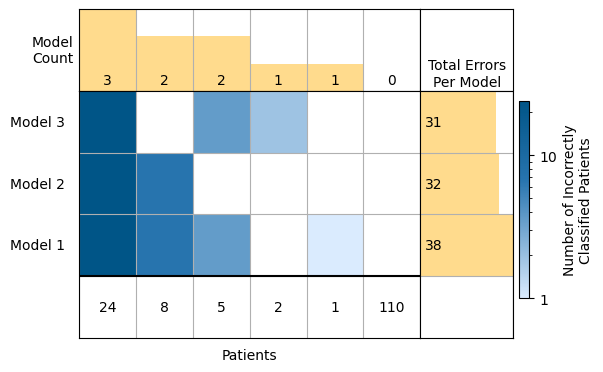

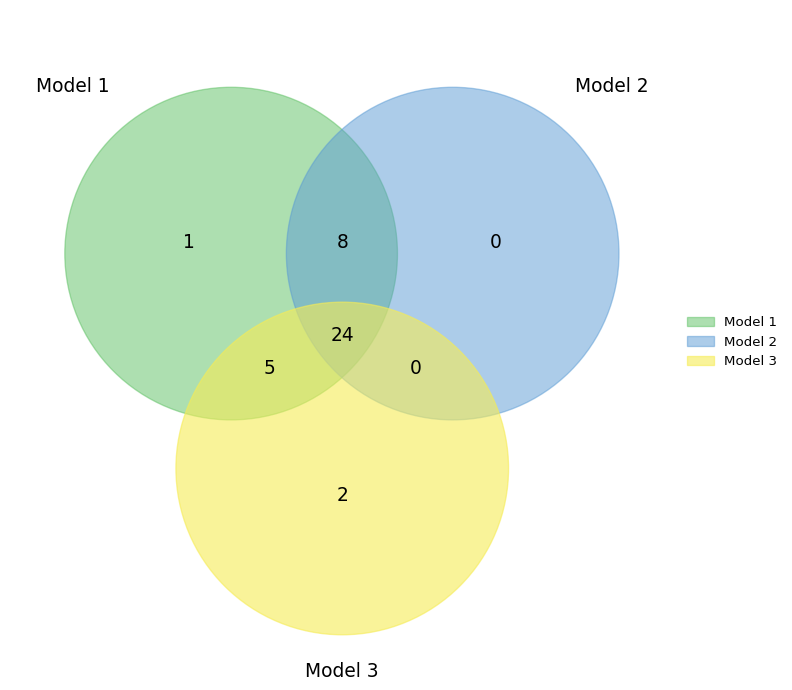

In [358]:
models = 3
set_range = 150

sets = generate_sets(models, set_range)
universe = set(range(set_range))
names = [f"Model {i + 1}" for i in range(models)]

plt.figure()
supervenn(
    sets,
    set_annotations=names,
    log_color=True,
    square_cell=True,
    universe=universe,
)
plt.show()

labels = venn.get_labels(sets, fill=["number"])
fig, ax = venn.venn3(labels, names=names)
legend = ax.get_legend()
legend.get_frame().set_alpha(0)
plt.show()

## 4 model

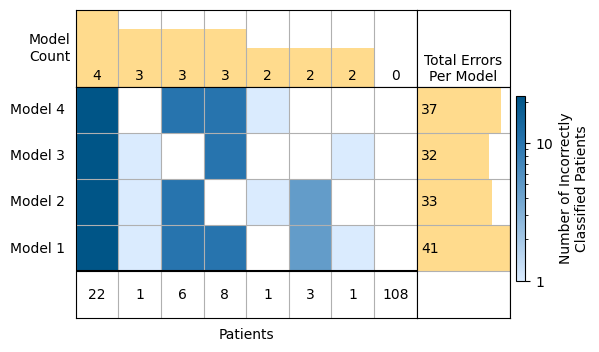

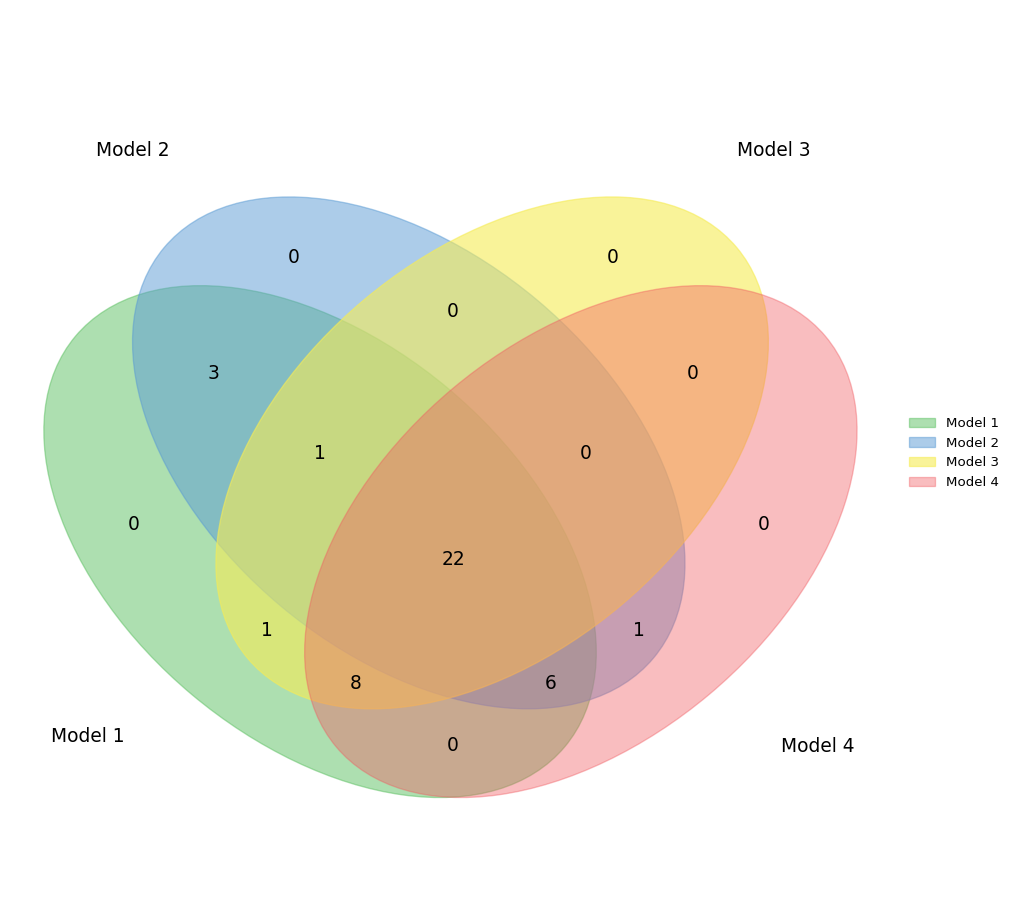

In [359]:
models = 4
set_range = 150

sets = generate_sets(models, set_range)
universe = set(range(set_range))
names = [f"Model {i + 1}" for i in range(models)]

plt.figure()
supervenn(
    sets,
    set_annotations=names,
    log_color=True,
    square_cell=True,
    universe=universe,
)
plt.show()

labels = venn.get_labels(sets, fill=["number"])
fig, ax = venn.venn4(labels, names=names)
legend = ax.get_legend()
legend.get_frame().set_alpha(0)
plt.show()

## 5 model

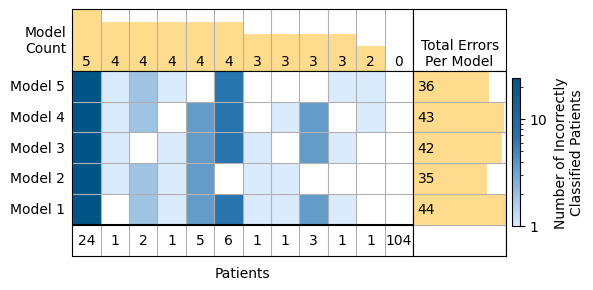

In [365]:
models = 5
set_range = 150

sets = generate_sets(models, set_range)
universe = set(range(set_range))
names = [f"Model {i + 1}" for i in range(models)]

plt.figure()
supervenn(
    sets,
    set_annotations=names,
    log_color=True,
    square_cell=True,
    universe=universe,
)
plt.show()

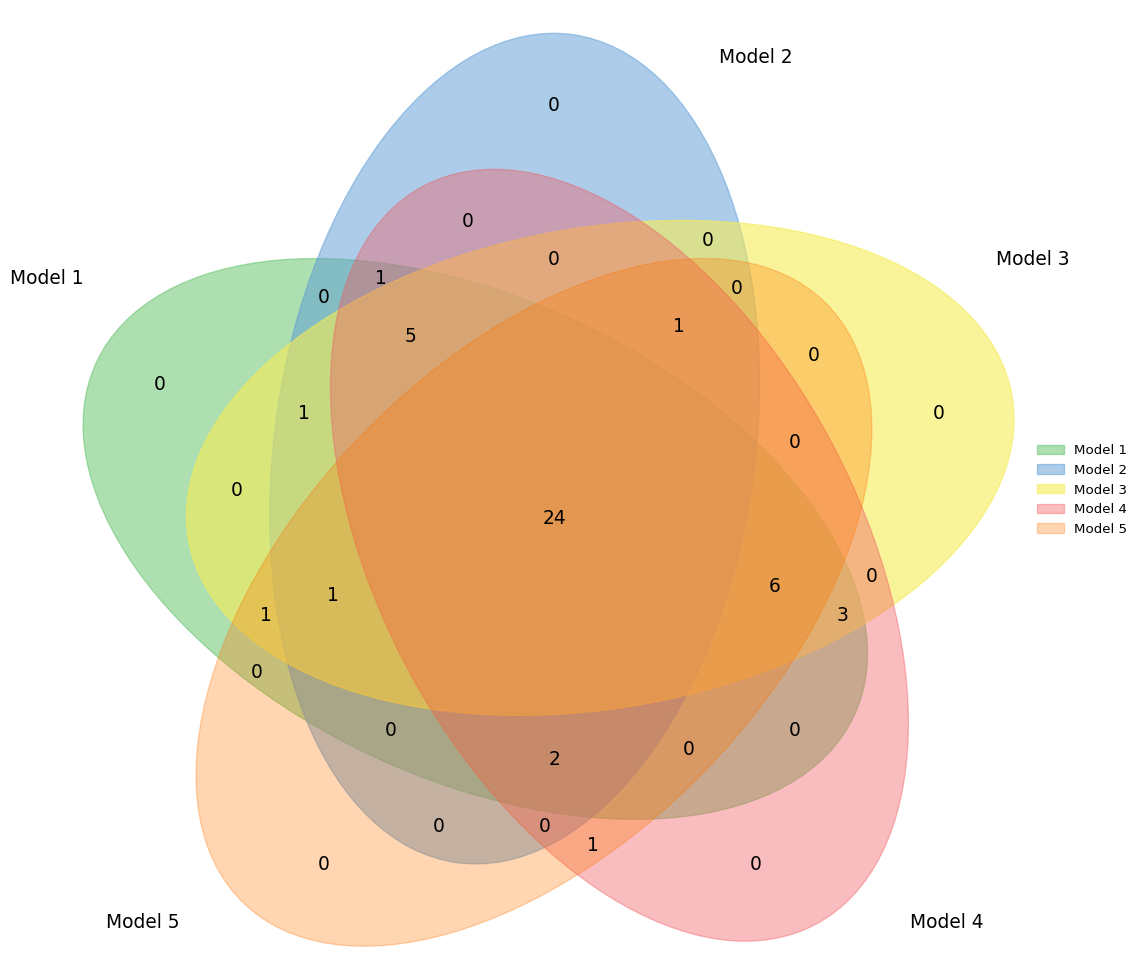

In [366]:
labels = venn.get_labels(sets, fill=["number"])
fig, ax = venn.venn5(labels, names=names)
legend = ax.get_legend()
legend.get_frame().set_alpha(0)
plt.show()

## 6 model

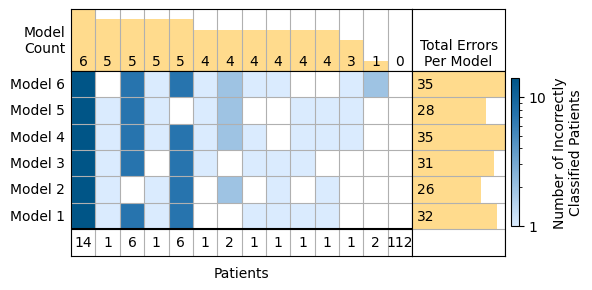

In [367]:
models = 6
set_range = 150

sets = generate_sets(models, set_range)
universe = set(range(set_range))
names = [f"Model {i + 1}" for i in range(models)]

plt.figure()
supervenn(
    sets,
    set_annotations=names,
    log_color=True,
    square_cell=True,
    universe=universe,
)
plt.show()

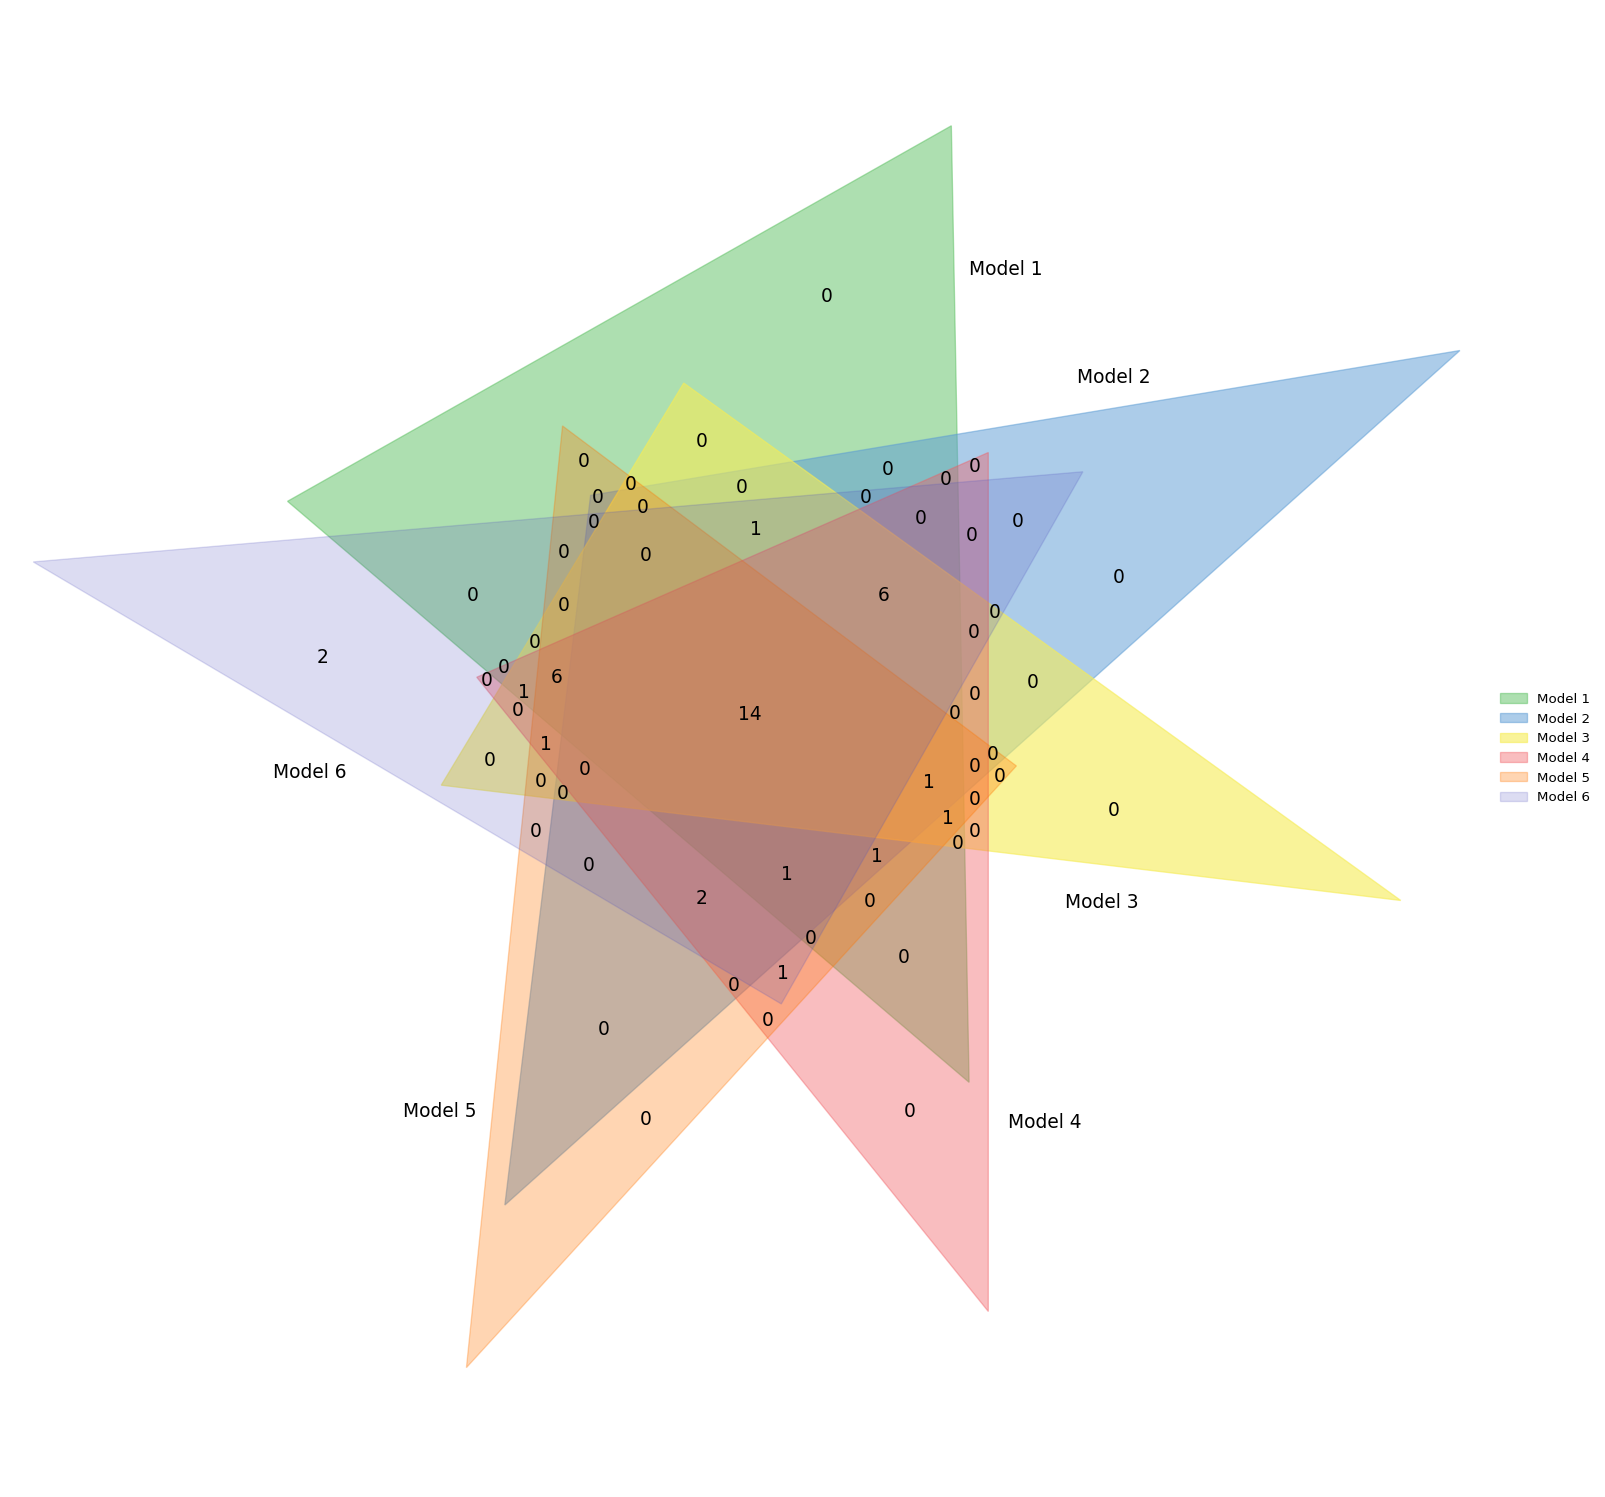

In [368]:
labels = venn.get_labels(sets, fill=["number"])
fig, ax = venn.venn6(labels, names=names)
legend = ax.get_legend()
legend.get_frame().set_alpha(0)
ax.set_ylim(0, 1)
ax.set_xlim(0, 1)
plt.show()

## Higher

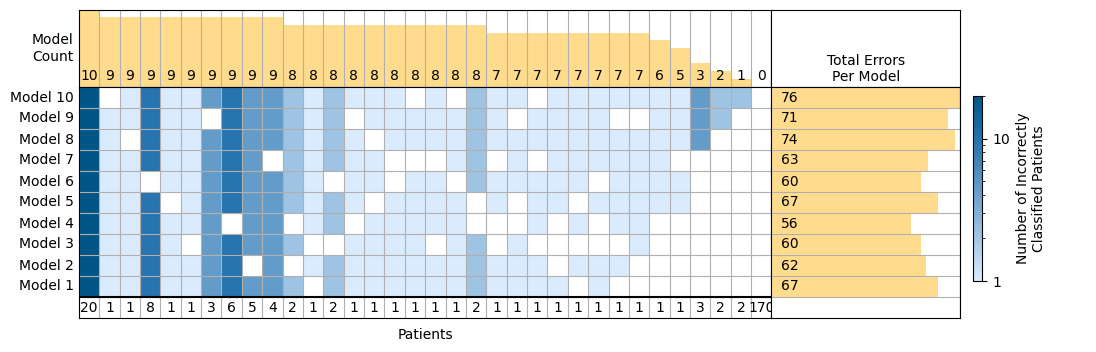

In [385]:
models = 10
set_range = 250

sets = generate_sets(models, set_range, overlap=0.8)
universe = set(range(set_range))
names = [f"Model {i + 1}" for i in range(models)]

plt.figure(figsize=(13, 4))
supervenn(
    sets,
    set_annotations=names,
    log_color=True,
    # square_cell=True,
    universe=universe,
)
plt.show()